## Data Reading

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("student_version.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


## Some EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [44]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [45]:
df["ChestPainType"].unique()

array(['NAP', 'ASY', 'TA', 'ATA'], dtype=object)

In [46]:
df["ChestPainType"].value_counts()

ChestPainType
ASY    401
NAP    162
ATA    139
TA      32
Name: count, dtype: int64

In [47]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    379
Up      307
Down     48
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='percent'>

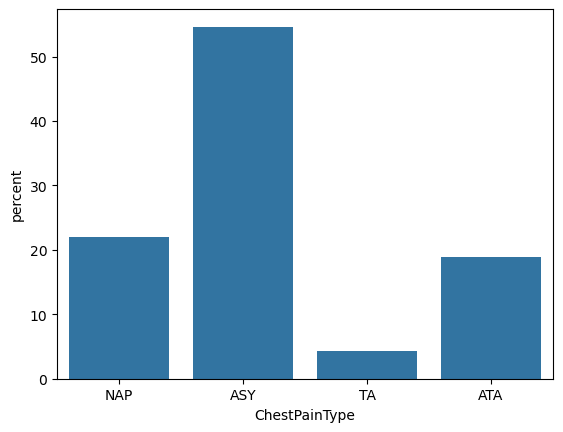

In [48]:
sns.countplot(data=df,stat="percent",x="ChestPainType")

<Axes: xlabel='Sex', ylabel='percent'>

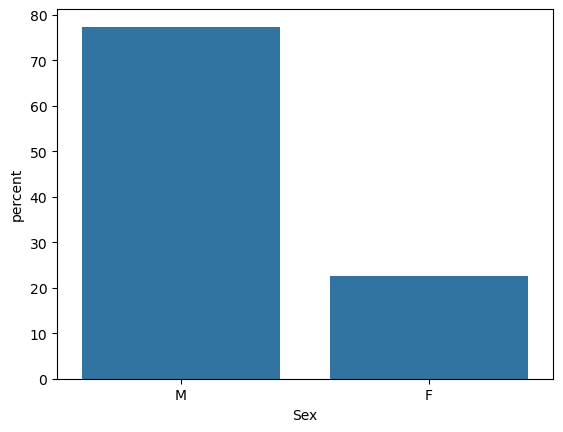

In [49]:
sns.countplot(data=df,stat="percent",x="Sex")

<Axes: xlabel='Age', ylabel='Count'>

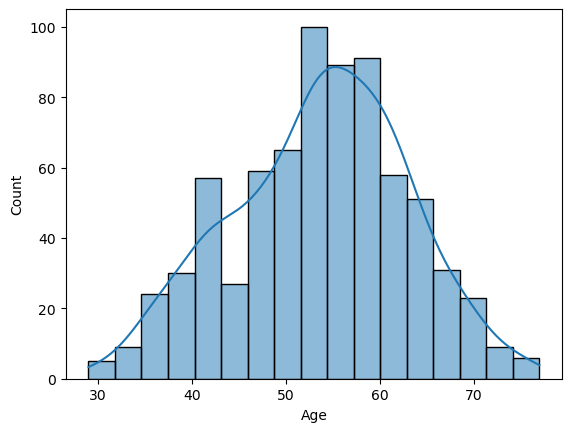

In [50]:
sns.histplot(data=df,x="Age",kde=True)

Ages are approximately normally distributed.

<Axes: xlabel='RestingBP', ylabel='Count'>

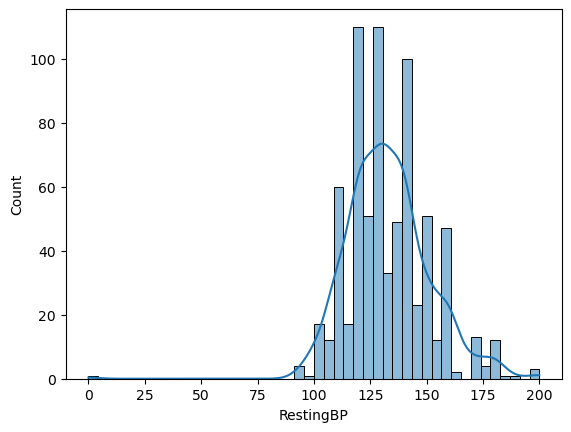

In [51]:
sns.histplot(data=df,x="RestingBP",kde=True)

In [52]:
df['FastingBS'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='HeartDisease', ylabel='count'>

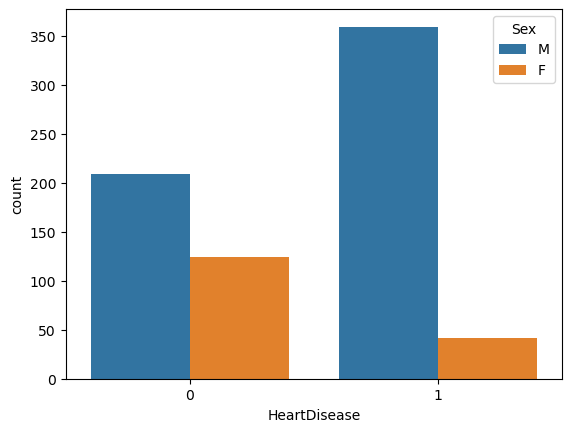

In [53]:
sns.countplot(data=df,x='HeartDisease',hue='Sex')

In [54]:
df['RestingECG'].unique()

array(['Normal', 'LVH', 'ST'], dtype=object)

<Axes: xlabel='RestingBP'>

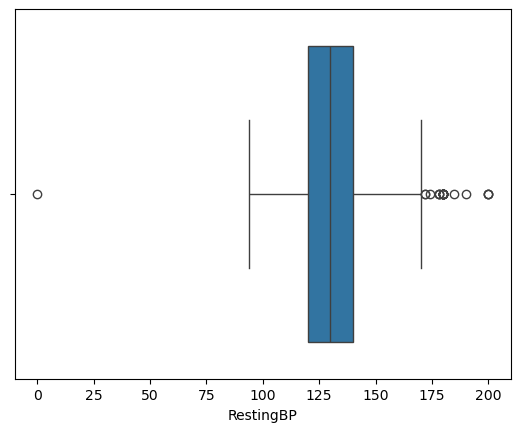

In [55]:
sns.boxplot(data=df,x='RestingBP')

We can deduce here that RestingBP have outliers

In [56]:
def removeOutliers(col_name):
    q1,q3 = df[col_name].quantile(0.25),df[col_name].quantile(0.75)
    iqr = q3 - q1
    high,low = q3+iqr,q1-iqr
    df.loc[df[col_name]>high,col_name] = high
    df.loc[df[col_name]<low,col_name] = low

In [57]:
removeOutliers('RestingBP')

<Axes: xlabel='RestingBP'>

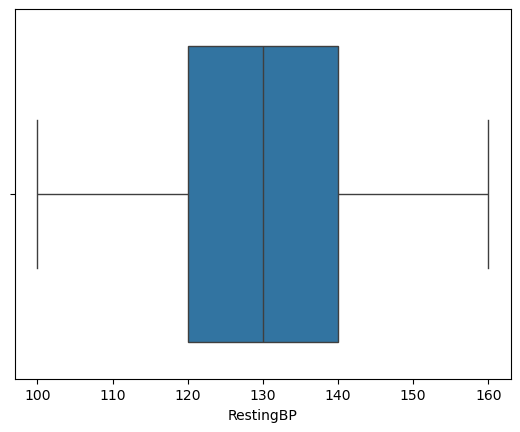

In [58]:
sns.boxplot(data=df,x='RestingBP')

<Axes: xlabel='Cholesterol'>

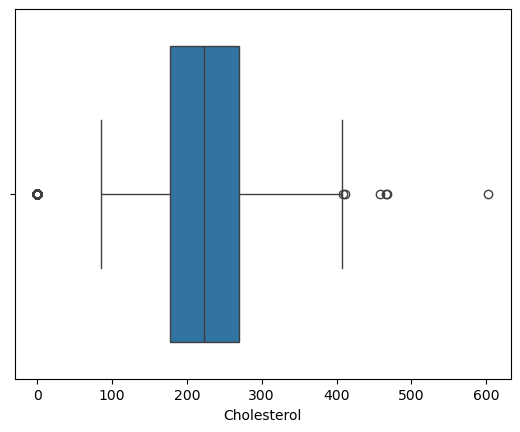

In [59]:
sns.boxplot(data=df,x='Cholesterol')

In [60]:
removeOutliers('Cholesterol')

<Axes: xlabel='Cholesterol'>

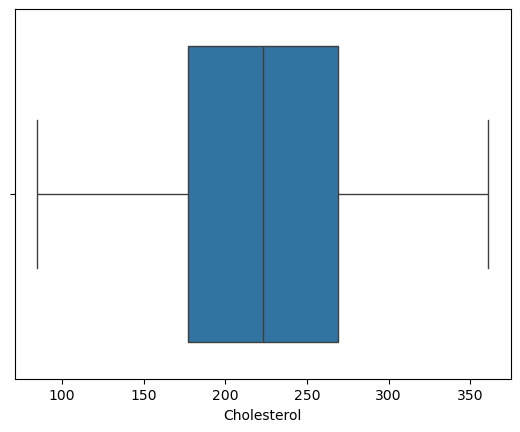

In [61]:
sns.boxplot(data=df,x='Cholesterol')

<Axes: xlabel='MaxHR'>

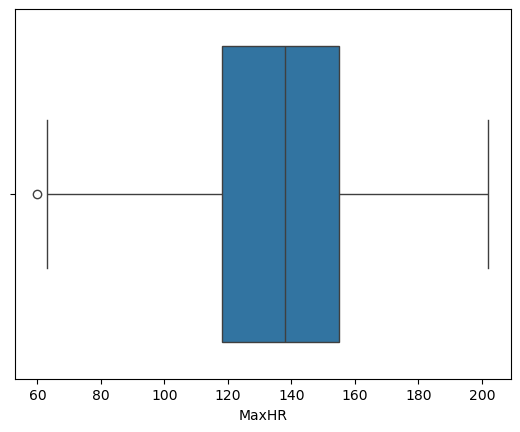

In [62]:
sns.boxplot(data=df,x='MaxHR')

In [63]:
removeOutliers('MaxHR')

<Axes: xlabel='MaxHR'>

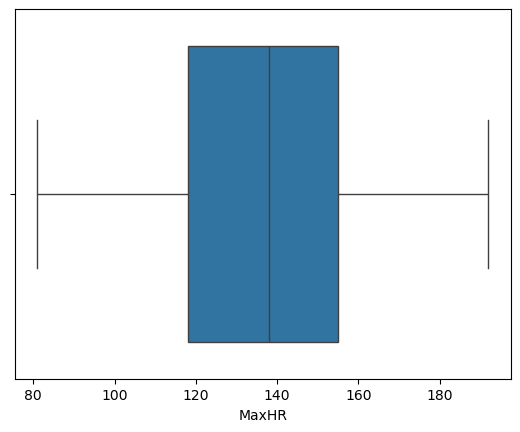

In [64]:
sns.boxplot(data=df,x='MaxHR')

In [65]:
features = df.iloc[:,:-1]
y = df.iloc[:,-1]
categorical_columns = features.select_dtypes(include=['object']).columns
numerical_columns = features.select_dtypes(exclude=['object']).columns
print(categorical_columns)
print(numerical_columns)
print(features.shape)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
(734, 11)


## KNN Model

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)
KNN_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2))
])

X_train,X_test,y_train,y_test = train_test_split(features, y, test_size=0.2, random_state=42)
KNN_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [67]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = KNN_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9251700680272109
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91        67
           1       0.90      0.97      0.93        80

    accuracy                           0.93       147
   macro avg       0.93      0.92      0.92       147
weighted avg       0.93      0.93      0.92       147



In [68]:
def plot_conf_matrix(conf_matrix,classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels = classes,  
                yticklabels = classes)  
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

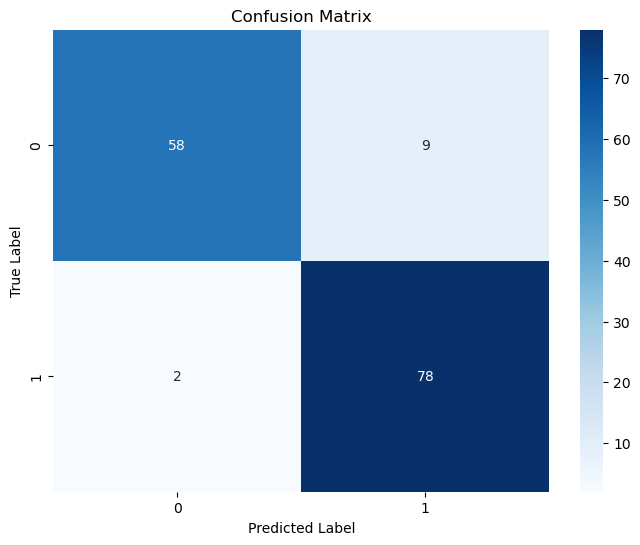

In [69]:
from sklearn.metrics import confusion_matrix
classes = np.unique(y)
conf_mat = confusion_matrix(y_test,y_pred)
plot_conf_matrix(conf_mat,classes)

In [70]:
import joblib
joblib.dump(KNN_model, 'knn_model_pipeline.pkl')

['knn_model_pipeline.pkl']

## Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
log_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [72]:
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)
print(f'Accuracy: {accuracy_log}')
print(f'Classification Report:\n{report_log}')

Accuracy: 0.891156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        67
           1       0.86      0.95      0.90        80

    accuracy                           0.89       147
   macro avg       0.90      0.89      0.89       147
weighted avg       0.89      0.89      0.89       147



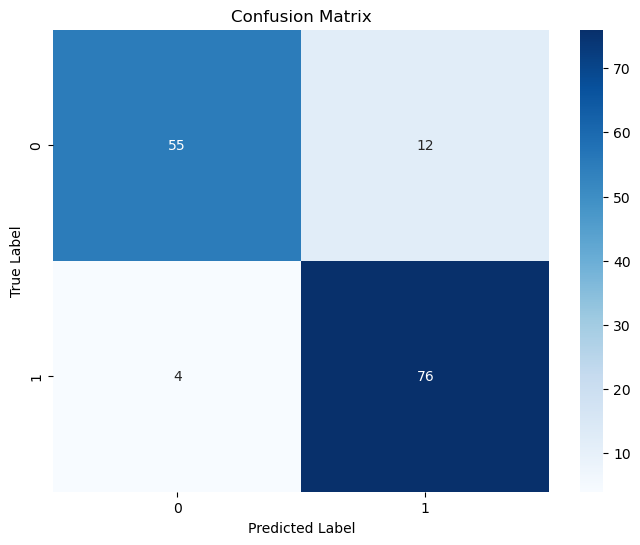

In [73]:
plot_conf_matrix(confusion_matrix(y_test,y_pred_log),np.unique(y_test))

In [74]:
joblib.dump(log_model, 'log_model_pipeline.pkl')

['log_model_pipeline.pkl']

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [76]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier

def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=preprocessor.fit_transform(X_train).shape[1], activation='relu')) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [77]:
NN_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0))
])

C:\Users\midoa\AppData\Local\Temp\ipykernel_17440\2624097015.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('classifier', KerasClassifier(build_fn=build_model, epochs=50, batch_size=32, verbose=0))


In [78]:
NN_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'))])),
                ('classifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000019E46673670>)])

In [79]:
y_pred_nn = NN_model.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)
print(f'Accuracy: {accuracy_nn}')
print(f'Classification Report:\n{report_nn}')

5/5 [==============================] - 0s 1ms/step
Accuracy: 0.9183673469387755
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        67
           1       0.88      0.99      0.93        80

    accuracy                           0.92       147
   macro avg       0.93      0.91      0.92       147
weighted avg       0.93      0.92      0.92       147



In [83]:
NN_model.named_steps['classifier'].model.save('nn_model.h5')  # Assuming 'model' is the name of the Keras model step in the pipeline
joblib.dump(NN_model.named_steps['preprocessor'], 'preprocessor_pipeline.pkl')

['preprocessor_pipeline.pkl']